#Algoritmos - Actividad Guiada 1

Nombre: Alejandro Napoleon Thoux<br>
URL: https://colab.research.google.com/github/catilo/algoritmos_optimizacion/blob/main/actividades/Algoritmos_AG1.ipynb

http:[https://github.com/catilo/algoritmos_optimizacion/blob/main/actividades/Algoritmos_AG1.ipynb](https://github.com/catilo/algoritmos_optimizacion/blob/main/actividades/Algoritmos_AG1.ipynb)


##Torres de Hanoi con Divide y vencerás

In [2]:
def Torres_Hanoi(N, desde, hasta):
  if N ==1 :
    print("Lleva la ficha " ,desde , " hasta ", hasta )

  else:
    #Torres_Hanoi(N-1, desde, 6-desde-hasta )
    Torres_Hanoi(N-1, desde, 6-desde-hasta )
    print("Lleva la ficha " ,desde , " hasta ", hasta )
    #Torres_Hanoi(N-1,6-desde-hasta, hasta )
    Torres_Hanoi(N-1, 6-desde-hasta  , hasta )


Torres_Hanoi(3, 1 , 3)

Lleva la ficha  1  hasta  3
Lleva la ficha  1  hasta  2
Lleva la ficha  3  hasta  2
Lleva la ficha  1  hasta  3
Lleva la ficha  2  hasta  1
Lleva la ficha  2  hasta  3
Lleva la ficha  1  hasta  3


In [14]:
#Sucesión_de_Fibonacci
#https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci
#Calculo del termino n-simo de la suscesión de Fibonacci
def Fibonacci(N:int):
  if N < 2:
    return 1
  else:
    return Fibonacci(N-1)+Fibonacci(N-2)

Fibonacci(5)

8

In [39]:
print(Fibonacci(40))

165580141


In [40]:
import cProfile

cProfile.run("Fibonacci(40)",sort='ncalls')

         331160977 function calls (698 primitive calls) in 52.075 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
331160275/0   52.071    0.000    0.000          3743385582.py:4(Fibonacci)
    88/84    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
       39    0.000    0.000    0.000    0.000 enum.py:1587(_get_value)
       28    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       22    0.000    0.000    0.000    0.000 base_events.py:766(time)
       22    0.000    0.000    0.000    0.000 {built-in method time.monotonic}
       21    0.000    0.000    0.000    0.000 base_events.py:2052(get_debug)
       17    0.000    0.000    0.000    0.000 enum.py:695(__call__)
       17    0.000    0.000    0.000    0.000 enum.py:1154(__new__)
       15    0.000    0.000    0.000    0.000 threading.py:605(is_set)
       15    0.000    0.000    0.000    0.000 threading.py:1134(is_alive)
       15  

#### Sucesiòn de Fibonacci usando la Relaciòn de Oro ( 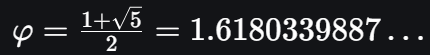) implementando la formula de Binet.  Este mètodo pierde precicisiòn mas alla de F(n) = 34 debido al error en el calculo por el uso de aritmetica de punto flotante. Ademas, en los primeros 5 nùmeros de la serie, el resultado no es preciso. La complejidad es de O(n).

In [30]:
def fibGoldenRatio(n: int):
    """"""
    GR = 1.6180339887
    fib = [1, 1, 2, 3, 5, 8 ]

    if n < 6:
        return fib[n]

    
    termino = 5
    fibbonacci = 8
    
    while termino < n:
        fibbonacci = round(fibbonacci * GR)
        termino+=1
    
    return fibbonacci

In [42]:
print(fibGoldenRatio(40))

165580141


In [41]:
import cProfile

cProfile.run("fibGoldenRatio(40)",sort='ncalls')

         39 function calls in 0.000 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       35    0.000    0.000    0.000    0.000 {built-in method builtins.round}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 2927278474.py:1(fibGoldenRatio)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




##Devolución de cambio por técnica voraz

In [60]:
def cambio_monedas(N, SM):
  SOLUCION = [0]*len(SM)   #SOLUCION = [0,0,0,0,..]
  ValorAcumulado = 0

  for i,valor in enumerate(SM):
    monedas =  (N-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if ValorAcumulado == N:
      return SOLUCION


cambio_monedas(15,[25,10,5,1])

[0, 1, 1, 0]

In [61]:
import cProfile

cProfile.run("cambio_monedas(15,[25,10,5,1])",sort='ncalls')

         5 function calls in 0.000 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 514988140.py:1(cambio_monedas)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




#### Se agrega una condicion adicional para limitar la cantidad de monedas disponibles.

In [63]:
def cambio_monedas_extra(N, SM):
    SOLUCION = [0]*len(SM)   #SOLUCION = [0,0,0,0,..]
    ValorAcumulado = 0

    for i,valor in enumerate(SM):
        monedas =  (N-ValorAcumulado)//valor[0]
        if monedas > valor[1]:
            monedas = valor[1]
            ValorAcumulado = ValorAcumulado + monedas*valor[0]
        else:
            ValorAcumulado = ValorAcumulado + monedas*valor[0]

        SOLUCION[i] = monedas
        
        if ValorAcumulado == N:
            return SOLUCION
    
    SOLUCION_SUB_OPTIMA = []
    [SOLUCION_SUB_OPTIMA.append(value[0]*value[1][0])  for value in zip(SOLUCION,SM)]
    return f"No se encontro solucion optima: {SOLUCION} Suma total: {sum(SOLUCION_SUB_OPTIMA)}"
    



cambio_monedas_extra(250,[(25,5),(10,1),(5,10),(1,23)])

'No se encontro solucion optima: [5, 1, 10, 23] Suma total: 208'

In [65]:
import cProfile

cProfile.run("cambio_monedas_extra(15,[(25,5),(10,1),(5,10),(1,23)])",sort='ncalls')

         5 function calls in 0.000 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1593940075.py:1(cambio_monedas_extra)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## N-Reinas por técnica de vueta atrás


In [66]:
def escribe(S):
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")


def es_prometedora(SOLUCION,etapa):
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True



def reinas(N, solucion=[], etapa=0):
  if len(solucion) == 0:
      solucion=[0 for i in range(N)]

  for i in range(1, N+1):
    solucion[etapa] = i

    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
        #escribe(solucion)
        print()
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

    solucion[etapa] = 0

reinas(8)

[1, 5, 8, 6, 3, 7, 2, 4]

[1, 6, 8, 3, 7, 4, 2, 5]

[1, 7, 4, 6, 8, 2, 5, 3]

[1, 7, 5, 8, 2, 4, 6, 3]

[2, 4, 6, 8, 3, 1, 7, 5]

[2, 5, 7, 1, 3, 8, 6, 4]

[2, 5, 7, 4, 1, 8, 6, 3]

[2, 6, 1, 7, 4, 8, 3, 5]

[2, 6, 8, 3, 1, 4, 7, 5]

[2, 7, 3, 6, 8, 5, 1, 4]

[2, 7, 5, 8, 1, 4, 6, 3]

[2, 8, 6, 1, 3, 5, 7, 4]

[3, 1, 7, 5, 8, 2, 4, 6]

[3, 5, 2, 8, 1, 7, 4, 6]

[3, 5, 2, 8, 6, 4, 7, 1]

[3, 5, 7, 1, 4, 2, 8, 6]

[3, 5, 8, 4, 1, 7, 2, 6]

[3, 6, 2, 5, 8, 1, 7, 4]

[3, 6, 2, 7, 1, 4, 8, 5]

[3, 6, 2, 7, 5, 1, 8, 4]

[3, 6, 4, 1, 8, 5, 7, 2]

[3, 6, 4, 2, 8, 5, 7, 1]

[3, 6, 8, 1, 4, 7, 5, 2]

[3, 6, 8, 1, 5, 7, 2, 4]

[3, 6, 8, 2, 4, 1, 7, 5]

[3, 7, 2, 8, 5, 1, 4, 6]

[3, 7, 2, 8, 6, 4, 1, 5]

[3, 8, 4, 7, 1, 6, 2, 5]

[4, 1, 5, 8, 2, 7, 3, 6]

[4, 1, 5, 8, 6, 3, 7, 2]

[4, 2, 5, 8, 6, 1, 3, 7]

[4, 2, 7, 3, 6, 8, 1, 5]

[4, 2, 7, 3, 6, 8, 5, 1]

[4, 2, 7, 5, 1, 8, 6, 3]

[4, 2, 8, 5, 7, 1, 3, 6]

[4, 2, 8, 6, 1, 3, 5, 7]

[4, 6, 1, 5, 2, 8, 3, 7]

[4, 6, 8, 2, 7, 1, 3, 5]

[4, 6, 8, 3,

## Viaje por el rio. Programación dinámica

In [67]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]



################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA
################################################################


PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return ""
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              )

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'